In [9]:
from astroquery.gaia import Gaia
from astropy.coordinates import SkyCoord
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np

center = SkyCoord(l=0*u.deg, b=0*u.deg, frame='galactic').icrs
radius = 0.1 * u.deg

Gaia.ROW_LIMIT=-1
job = Gaia.cone_search_async(center, radius)
result = job.get_results()

print(result)

INFO: Query finished. [astroquery.utils.tap.core]
    solution_id             DESIGNATION          ...          dist        
                                                 ...                      
------------------- ---------------------------- ... ---------------------
1635721458409799680 Gaia DR2 4057483435920382848 ...  0.001612672758704896
1635721458409799680 Gaia DR2 4057483337143120384 ... 0.0038237201260153527
1635721458409799680 Gaia DR2 4057483337135572992 ...  0.004400416836486774
1635721458409799680 Gaia DR2 4057483440214782464 ...  0.004466731292568158
1635721458409799680 Gaia DR2 4057483337143121792 ...  0.004881468110232814
1635721458409799680 Gaia DR2 4057483435926402432 ...  0.005244452695003098
                ...                          ... ...                   ...
1635721458409799680 Gaia DR2 4057476568267027072 ...   0.09983523234637065
1635721458409799680 Gaia DR2 4057470310500218368 ...   0.09987032275434465
1635721458409799680 Gaia DR2 4057487043693047680 .

Stars after filtering: 2331


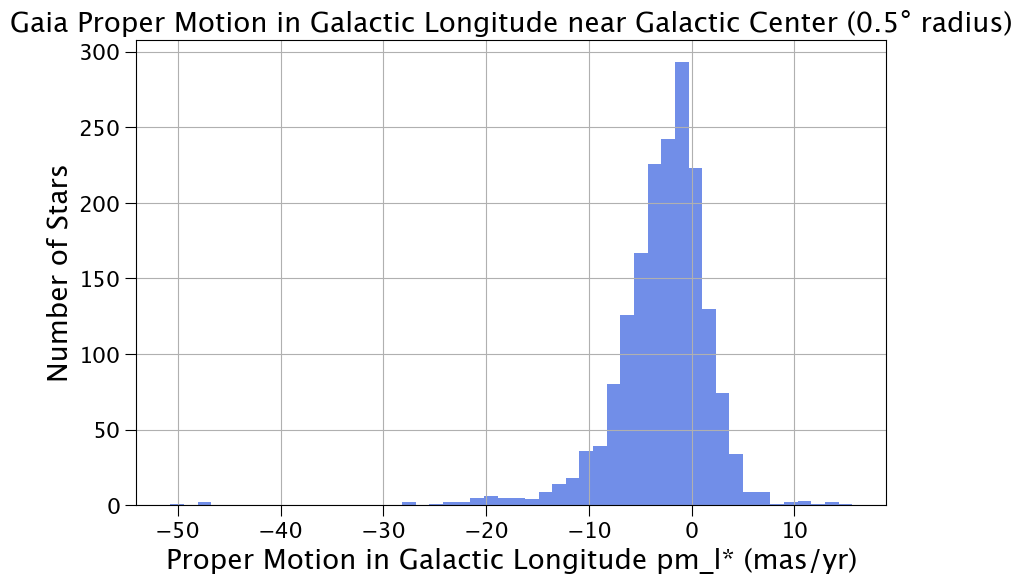

In [10]:
mask = (result['phot_g_mean_mag'] < 30)
filtered = result[mask]

print(f"Stars after filtering: {len(filtered)}")

ra_vals = np.array(filtered['ra'], dtype=float)
dec_vals = np.array(filtered['dec'], dtype=float)
pmra_vals = np.array(filtered['pmra'], dtype=float)
pmdec_vals = np.array(filtered['pmdec'], dtype=float)

coords = SkyCoord(ra=ra_vals*u.deg,
                  dec=dec_vals*u.deg,
                  pm_ra_cosdec=pmra_vals*u.mas/u.yr,
                  pm_dec=pmdec_vals*u.mas/u.yr,
                  frame='icrs')

gal_coords = coords.transform_to('galactic')
pm_l_cosb = gal_coords.pm_l_cosb.to(u.mas/u.yr).value

plt.figure(figsize=(10,6))
plt.hist(pm_l_cosb, bins=50, color='royalblue', alpha=0.75)
plt.xlabel('Proper Motion in Galactic Longitude pm_l* (mas/yr)')
plt.ylabel('Number of Stars')
plt.title('Gaia Proper Motion in Galactic Longitude near Galactic Center (0.5° radius)')
plt.grid(True)
plt.show()